In [2]:
# Import the Required Packages
import os
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline

!nvidia-smi -L

from google.colab import drive
drive.mount('/content/drive')

## Step 1: Data Loading

In [3]:
base_dir = ''

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [4]:
# All images will be rescaled by 1./255
#Currently, no augmentation will be applied
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

img_size = 200

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 300x300
        target_size=(img_size, img_size),
        #30 is a reasonable batch size for model processing such that the 
        #updated parameters may turn out better during training as compared to a smaller batch size
        batch_size=30,
        # Since there are multiple unique dishes, we will be using categorical classification
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=30,
        class_mode='categorical')

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
data batch shape: (30, 200, 200, 3)
labels batch shape: (30, 10)


## Step 2:  Develop the Image Classification Models

### Model #1

In [ ]:
# Build the Model
model = models.Sequential()
# Decided on maxpoolng convet with increasing layers, set kernel_size to (5, 5) to allow for better feature learning
# based on larger image size of 200x200
#Added increasing filter sizes for learning more complex feature combinations
#as the model progresses in training
model.add(layers.Conv2D(16, (5, 5), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))
# Using Softmax activation for multiclass classification with 10 neurons for each class available

model.summary()

model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 196, 196, 16)      1216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 98, 98, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 94, 94, 32)        12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 47, 47, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 43, 43, 64)        51264     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 21, 21, 64)       0

In [ ]:
# Train the Model
history = model.fit(
      train_generator,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50

Epoch 1/30
250/250 [==============================] - 5348s 21s/step - loss: 2.1394 - acc: 0.2291 - val_loss: 2.0204 - val_acc: 0.2907
Epoch 2/30
250/250 [==============================] - 286s 1s/step - loss: 1.9618 - acc: 0.3055 - val_loss: 1.9046 - val_acc: 0.3280
Epoch 3/30
250/250 [==============================] - 116s 465ms/step - loss: 1.8751 - acc: 0.3491 - val_loss: 1.8547 - val_acc: 0.3460
Epoch 4/30
250/250 [==============================] - 75s 300ms/step - loss: 1.8072 - acc: 0.3708 - val_loss: 1.8408 - val_acc: 0.3640
Epoch 5/30
250/250 [==============================] - 68s 270ms/step - loss: 1.7422 - acc: 0.4035 - val_loss: 1.7863 - val_acc: 0.3700
Epoch 6/30
250/250 [==============================] - 67s 267ms/step - loss: 1.6941 - acc: 0.4133 - val_loss: 1.7782 - val_acc: 0.3713
Epoch 7/30
250/250 [==============================] - 65s 260ms/step - loss: 1.6439 - acc: 0.4340 - val_loss: 1.7489 - val_acc: 0.3953
Epoch 8/30
250/250 [==============================] - 64

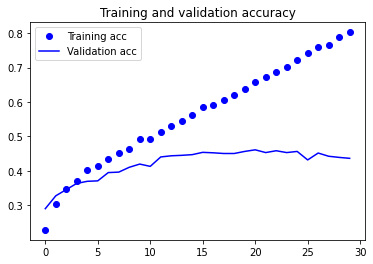

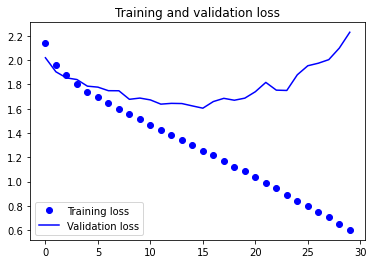

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [5]:
#Add in data augmentation to training data
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

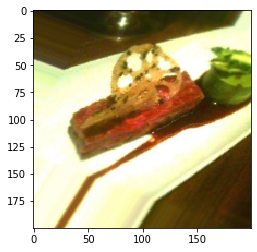

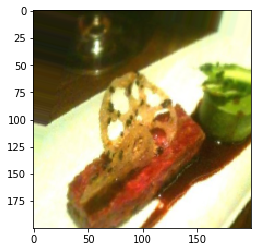

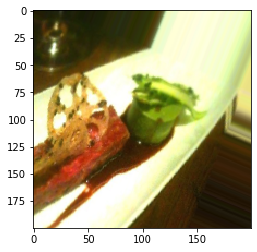

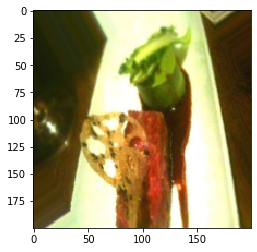

In [8]:
import os
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing import image
train_beeftartare_dir = os.path.join(train_dir, 'beef_tartare')

fnames = [os.path.join(train_beeftartare_dir, fname) for fname in os.listdir(train_beeftartare_dir)]

# We pick one image to "augment"
img_path = fnames[3]

# Read the image and resize it
img = image.load_img(img_path, target_size=(img_size, img_size))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in train_datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
        

plt.show()

In [14]:
#Improving existing model using dropout and L2 regularization
#Increased filter size for max pooling to (3, 3)
model = models.Sequential()
model.add(layers.Conv2D(16, (5, 5), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(128, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Flatten())
#Adding dropout after flattening maxpool conv layers
model.add(layers.Dropout(0.5))
#Adding L2 regularization to help with keeping weights and biases small to prevent overfitting
model.add(layers.Dense(256, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 196, 196, 16)      1216      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 98, 98, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 94, 94, 32)        12832     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 47, 47, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 43, 43, 64)        51264     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 14, 14, 64)      

In [15]:
#Compile and Fit data into model while increasing learning rate by 2 Times
#higher learning rate in hopes of optimizing weights on a larger scale
model.compile(optimizer=optimizers.RMSprop(learning_rate=2*1e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(
      train_generator,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
250/250 [==============================] - 69s 266ms/step - loss: 2.5370 - acc: 0.1577 - val_loss: 2.3271 - val_acc: 0.2600
Epoch 2/30
250/250 [==============================] - 66s 265ms/step - loss: 2.3012 - acc: 0.2365 - val_loss: 2.1846 - val_acc: 0.2680
Epoch 3/30
250/250 [==============================] - 66s 265ms/step - loss: 2.1930 - acc: 0.2785 - val_loss: 2.0950 - val_acc: 0.3160
Epoch 4/30
250/250 [==============================] - 67s 266ms/step - loss: 2.0803 - acc: 0.3200 - val_loss: 2.0104 - val_acc: 0.3413
Epoch 5/30
250/250 [==============================] - 66s 265ms/step - loss: 2.0026 - acc: 0.3437 - val_loss: 1.9829 - val_acc: 0.3593
Epoch 6/30
250/250 [==============================] - 66s 266ms/step - loss: 1.9214 - acc: 0.3797 - val_loss: 1.8579 - val_acc: 0.4167
Epoch 7/30
250/250 [==============================] - 66s 266ms/step - loss: 1.8603 - acc: 0.3935 - val_loss: 1.8086 - val_acc: 0.4280
Epoch 8/30
250/250 [==============================] - 6

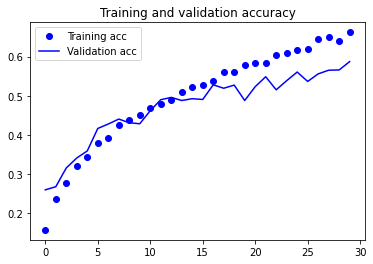

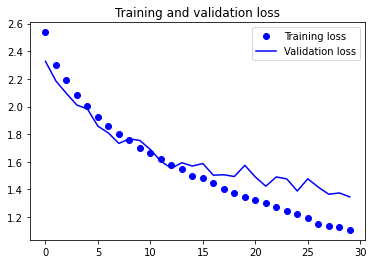

In [16]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [17]:
# Save the Model
model.save(base_dir + '/food_model_1.h5')

### Model #2

In [ ]:
#Pretrained conv network preparation
#After much research, it was found that MobileNet has great performances with images having a larger size.
#It was also stated that it was good for multiclass classification
#MobileNet accepts a minimum image size of 224x224 pixels which offers a wider range of image learning
from tensorflow.keras.applications import MobileNet
img_size = 224
conv_base = MobileNet(weights='imagenet',
                      input_shape=(img_size, img_size, 3),
                      classifier_activation='softmax')

conv_base.summary()

17235968/17225924 [==============================] - 1s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32

In [ ]:
#Freeze pretrained CNN layers
#Freezing first to make a comparison between a normal NN model against a MobileNet model.
conv_base.trainable = False
def print_layer_trainable():
    for layer in conv_base.layers:
        print("{0}:\t{1}".format(layer.trainable, layer.name))
print_layer_trainable()

False:	input_1
False:	conv1
False:	conv1_bn
False:	conv1_relu
False:	conv_dw_1
False:	conv_dw_1_bn
False:	conv_dw_1_relu
False:	conv_pw_1
False:	conv_pw_1_bn
False:	conv_pw_1_relu
False:	conv_pad_2
False:	conv_dw_2
False:	conv_dw_2_bn
False:	conv_dw_2_relu
False:	conv_pw_2
False:	conv_pw_2_bn
False:	conv_pw_2_relu
False:	conv_dw_3
False:	conv_dw_3_bn
False:	conv_dw_3_relu
False:	conv_pw_3
False:	conv_pw_3_bn
False:	conv_pw_3_relu
False:	conv_pad_4
False:	conv_dw_4
False:	conv_dw_4_bn
False:	conv_dw_4_relu
False:	conv_pw_4
False:	conv_pw_4_bn
False:	conv_pw_4_relu
False:	conv_dw_5
False:	conv_dw_5_bn
False:	conv_dw_5_relu
False:	conv_pw_5
False:	conv_pw_5_bn
False:	conv_pw_5_relu
False:	conv_pad_6
False:	conv_dw_6
False:	conv_dw_6_bn
False:	conv_dw_6_relu
False:	conv_pw_6
False:	conv_pw_6_bn
False:	conv_pw_6_relu
False:	conv_dw_7
False:	conv_dw_7_bn
False:	conv_dw_7_relu
False:	conv_pw_7
False:	conv_pw_7_bn
False:	conv_pw_7_relu
False:	conv_dw_8
False:	conv_dw_8_bn
False:	conv_dw_8_relu

In [ ]:
# Image preprocessing
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

img_size = 224

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 300x300
        target_size=(img_size, img_size),
        #30 is a reasonable batch size for model processing such that the 
        #updated parameters may turn out better during training as compared to a smaller batch size
        batch_size=30,
        # Since there are multiple unique dishes, we will be using categorical classification
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=30,
        class_mode='categorical')


for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break


Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
data batch shape: (30, 224, 224, 3)
labels batch shape: (30, 10)


In [ ]:
# Building the Model with layers that fit the training features
model = models.Sequential()
model.add(conv_base)
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 1000)             4253864   
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 256)               256256    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 10)                2570      
                                                                 
Total params: 4,512,690
Trainable params: 258,826
Non-trainable params: 4,253,864
_________________________________________________________________


In [ ]:
#Compiling the model with categorical crossentropy
model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(
      train_generator,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
250/250 [==============================] - 73s 278ms/step - loss: 2.2805 - acc: 0.2288 - val_loss: 2.2566 - val_acc: 0.3893
Epoch 2/30
250/250 [==============================] - 68s 272ms/step - loss: 2.2282 - acc: 0.4032 - val_loss: 2.2016 - val_acc: 0.4433
Epoch 3/30
250/250 [==============================] - 68s 271ms/step - loss: 2.1650 - acc: 0.4571 - val_loss: 2.1306 - val_acc: 0.4660
Epoch 4/30
250/250 [==============================] - 67s 270ms/step - loss: 2.0876 - acc: 0.4795 - val_loss: 2.0559 - val_acc: 0.4700
Epoch 5/30
250/250 [==============================] - 68s 273ms/step - loss: 2.0012 - acc: 0.4833 - val_loss: 1.9726 - val_acc: 0.4793
Epoch 6/30
250/250 [==============================] - 68s 271ms/step - loss: 1.9117 - acc: 0.4927 - val_loss: 1.8739 - val_acc: 0.4880
Epoch 7/30
250/250 [==============================] - 68s 271ms/step - loss: 1.8268 - acc: 0.5025 - val_loss: 1.7983 - val_acc: 0.4860
Epoch 8/30
250/250 [==============================] - 6

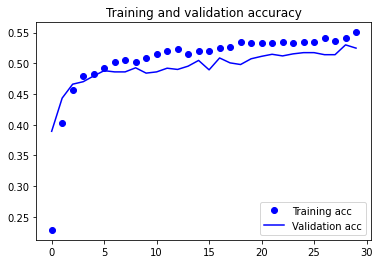

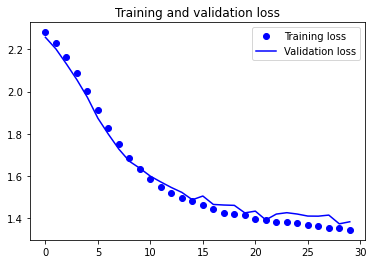

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
#Unfreeze pretrained layers, apply data augmentation
conv_base.trainable = True

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [ ]:
#Recreate model with unfrozen layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 1000)             4253864   
 nal)                                                            
                                                                 
 dense (Dense)               (None, 256)               256256    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 4,512,690
Trainable params: 4,490,802
Non-trainable params: 21,888
_________________________________________________________________


In [ ]:
#Compile and fit the model again
model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(
      train_generator,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
250/250 [==============================] - 5181s 21s/step - loss: 2.2415 - acc: 0.3872 - val_loss: 2.1725 - val_acc: 0.5540
Epoch 2/30
250/250 [==============================] - 296s 1s/step - loss: 2.0236 - acc: 0.7272 - val_loss: 1.9126 - val_acc: 0.7353
Epoch 3/30
250/250 [==============================] - 133s 532ms/step - loss: 1.7187 - acc: 0.7953 - val_loss: 1.5852 - val_acc: 0.7720
Epoch 4/30
250/250 [==============================] - 100s 397ms/step - loss: 1.3586 - acc: 0.8229 - val_loss: 1.2470 - val_acc: 0.7887
Epoch 5/30
250/250 [==============================] - 92s 366ms/step - loss: 0.9943 - acc: 0.8444 - val_loss: 1.1548 - val_acc: 0.7013
Epoch 6/30
250/250 [==============================] - 89s 354ms/step - loss: 0.6922 - acc: 0.8587 - val_loss: 0.8539 - val_acc: 0.7827
Epoch 7/30
250/250 [==============================] - 89s 354ms/step - loss: 0.4969 - acc: 0.8672 - val_loss: 0.7216 - val_acc: 0.7900
Epoch 8/30
250/250 [==============================] - 8

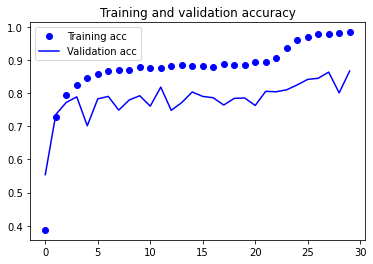

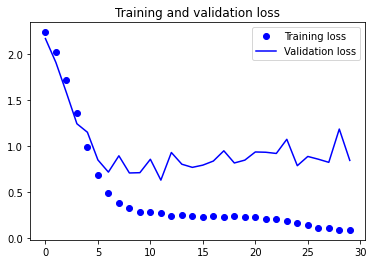

In [ ]:
#Plot the improved model
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend() 

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save(base_dir + '/food_model_2.h5')

## Step 3 – Evaluate the Developed Models using Testing Images

In [24]:
#Prepare Test Images Data Generator
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=30,
        class_mode='categorical')

Found 500 images belonging to 10 classes.


In [26]:
# Model #1

model = models.Sequential()
model.add(layers.Conv2D(16, (5, 5), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(128, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.load_weights(base_dir + '/food_model_1.h5')

model.summary()

model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 196, 196, 16)      1216      
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 98, 98, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 94, 94, 32)        12832     
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 47, 47, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 43, 43, 64)        51264     
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 14, 14, 64)      

In [28]:
test_loss, test_acc = model.evaluate(test_generator, verbose=2)

17/17 - 288s - loss: 1.4624 - acc: 0.5240 - 288s/epoch - 17s/step


In [40]:
# Model #2
from tensorflow.keras.applications import MobileNet
img_size = 224
conv_base = MobileNet(weights='imagenet',
                      input_shape=(img_size, img_size, 3),
                      classifier_activation='softmax')

conv_base.trainable = True

model = models.Sequential()
model.add(conv_base)
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.load_weights(base_dir + '/food_model_2.h5')

model.summary()

model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 1000)             4253864   
 nal)                                                            
                                                                 
 dense_26 (Dense)            (None, 256)               256256    
                                                                 
 dropout_20 (Dropout)        (None, 256)               0         
                                                                 
 dense_27 (Dense)            (None, 10)                2570      
                                                                 
Total params: 4,512,690
Trainable params: 4,490,802
Non-trainable params: 21,888
_________________________________________________________________


In [41]:
test_loss, test_acc = model.evaluate(test_generator, verbose=2)

17/17 - 5s - loss: 1.1727 - acc: 0.8200 - 5s/epoch - 265ms/step


In [42]:
# Save the best model


model.save(base_dir+'/food_model_best.h5')

## Step 4  – Use the best model to make prediction

In [43]:
# Load the model
from tensorflow.keras.applications import MobileNet
img_size = 224
conv_base = MobileNet(weights='imagenet',
                      input_shape=(img_size, img_size, 3),
                      classifier_activation='softmax')

conv_base.trainable = True

model = models.Sequential()
model.add(conv_base)
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.load_weights(base_dir + '/food_model_best.h5')

model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])

In [44]:
# Load the food list (in alphabetical order)
with open(base_dir+'/13.txt', 'r') as f: # the .txt file which contains a list of food assigned to you
    x = f.readlines()
food_list =[]
for item in x:
    food_list.append(item.strip('\n'))
food_list = sorted(food_list) # food_list needs to be sorted alphabetically before feed into prediction() function
print(food_list)

['beef_tartare', 'beignets', 'breakfast_burrito', 'chocolate_cake', 'crab_cakes', 'creme_brulee', 'fried_calamari', 'gyoza', 'lobster_roll_sandwich', 'omelette']


In [45]:
# Define some related functions for image process and model prediction
from tensorflow.keras.preprocessing.image import load_img, img_to_array
def image_process(img):
    image = load_img(img, target_size =(img_size, img_size))
    image_array = img_to_array(image)/255
    return image_array

import pandas as pd
def prediction(model, img_array, items_l):
    prob = model.predict(img_array.reshape(1,img_size,img_size,3))
    pro_df = pd.DataFrame(prob, columns = items_l)
    result = items_l[np.argmax(prob)]
    return pro_df, result

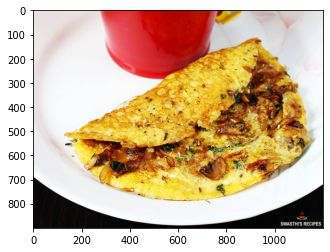

The prediction is:  omelette 

    beef_tartare  beignets  ...  lobster_roll_sandwich  omelette
0      0.005265  0.001484  ...               0.002085  0.957169

[1 rows x 10 columns]


In [47]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
img = base_dir +'/mushroom-omelette-recipe.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

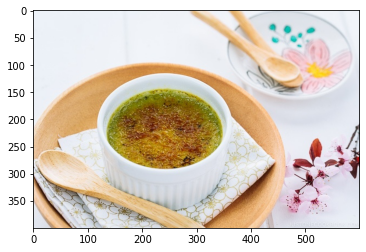

The prediction is:  creme_brulee 

    beef_tartare  beignets  ...  lobster_roll_sandwich  omelette
0      0.000016  0.000008  ...               0.000007  0.000234

[1 rows x 10 columns]


In [48]:
img = base_dir +'/Green-Tea-Creme-Brulee.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

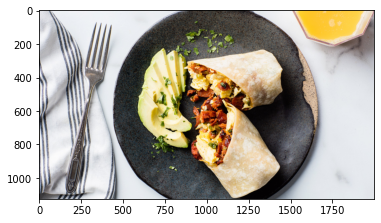

The prediction is:  breakfast_burrito 

    beef_tartare  beignets  ...  lobster_roll_sandwich  omelette
0      0.000049  0.000027  ...               0.000061  0.067639

[1 rows x 10 columns]


In [50]:
img = base_dir +'/noname.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)